# Best Feature Selection Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Regression

In [2]:
r_dataset = pd.read_csv('50_Startups.csv')

In [22]:
r_dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
r_dataset = pd.get_dummies(r_dataset, drop_first = True)
r_dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [46]:
# Normalise the Dataset 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized = sc.fit_transform(r_dataset[r_dataset.columns[:-2]])

r_dataset_2 = pd.DataFrame(np.concatenate((normalized,r_dataset.iloc[:,4:6].values), axis = 1), 
                           columns = list(r_dataset.columns))

In [51]:
rearrange_cols = r_dataset_2.columns.tolist()
rearrange_cols = rearrange_cols[:3] + rearrange_cols[4:] + ['Profit']

In [52]:
r_dataset_2 = r_dataset_2[rearrange_cols]

In [53]:
r_dataset_2.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,2.016411,0.560753,2.153943,0.0,1.0,2.011203
1,1.955860,1.082807,1.923600,0.0,0.0,1.999430
2,1.754364,-0.728257,1.626528,1.0,0.0,1.980842
3,1.554784,-0.096365,1.422210,0.0,1.0,1.776627
4,1.504937,-1.079919,1.281528,1.0,0.0,1.357740


In [55]:
x = r_dataset_2.iloc[:,:-1].values
y = r_dataset_2.iloc[:,-1].values

In [59]:
x[0]

array([2.01641149, 0.56075291, 2.15394309, 0.        , 1.        ])

### 1) Backward Elimination

### 2) Recursive Forward Elimination (RFE)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=2, step=10, verbose=5)
rfe_selector.fit(x, y)
cols_selected = rfe_selector.get_support(indices = True)

Fitting estimator with 5 features.


In [71]:
list(r_dataset_2.columns[cols_selected])

['R&D Spend', 'Marketing Spend']

### 3) SelectKBest 

#### Score function:
#### For regression: **f_regression, mutual_info_regression**

In [75]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression

skb = SelectKBest(score_func=f_regression, k=2)  # use either f_classif or chi2
x_selected = skb.fit_transform(x,y)

In [77]:
cols_selected = skb.get_support(indices = True) # numpy array only - list wont work
list(r_dataset_2.columns[cols_selected])

['R&D Spend', 'Marketing Spend']

### Random Data

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

### 4) Correlation Matrix

### Matrixs

In [9]:
cor_matrix = r_dataset.corr().round(2)

In [11]:
cor_matrix['Profit'] # Correlation Coefficients of Target Variable with Others

R&D Spend          0.97
Administration     0.20
Marketing Spend    0.75
Profit             1.00
Name: Profit, dtype: float64

In [20]:
r_dataset[['Profit','Marketing Spend']].corr()

,Profit,Marketing Spend
Profit,1.000000,0.747766
Marketing Spend,0.747766,1.000000


### Heatmap

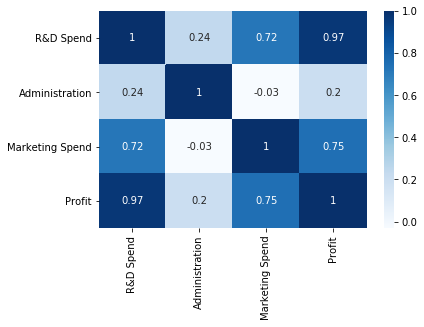

In [8]:
import seaborn as sns
correlation_matrix = r_dataset.corr().round(2)
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')

## Classification

In [201]:
from sklearn.datasets import load_iris

In [202]:
iris = load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [203]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [204]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

### Feature selection method: SelectKBest

#### Score function:
#### For classification: **chi2, f_classif, mutual_info_classif**

In [72]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

skb = SelectKBest(score_func=f_classif, k=2)  # use either f_classif or chi2
x_selected = skb.fit_transform(x,y)

C:\Users\himan\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [208]:
cols_selected

array([2, 3], dtype=int64)

In [213]:
dataset.columns[np.array([2,3])]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [207]:
cols_selected = skb.get_support(indices = True) # numpy array only - list wont work
list(dataset.columns[cols_selected])

['petal length (cm)', 'petal width (cm)']

### Example of **SelectKBest** on a Random Classification Dataset

In [88]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)
